#### Imports

In [1]:
# Visualization
import matplotlib.pyplot as plt

# Builtin
from pathlib import Path
import sys
import os
import pdb
import subprocess


# Add repo path to system path for additional imports. 
# Note the relative depth from this notebook to system repo
# in case you want to move this file

nb_path = str(Path(os.path.abspath("")).parent.parent)
sys.path.insert(0, nb_path)
print(f"Added {nb_path} to system path")

# This computer git repos
from project.project_manager_module import ProjectManager
import cxsystem2.neurodynlib as nd
from brian2.units import *

Added C:\Users\Simo\Laskenta\Git_Repos\SystemTools to system path


#### Build paths
<font color=red>**Set the root_path**</font>

In [2]:
#root_path = r"/opt2/Git_Repos/SystemTools/scripts/"
root_path = r"C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts/"

In [3]:
project = "FCN22"  
experiment = "Figure8"  
experiment_path = Path.joinpath(Path(root_path), Path(project), experiment)

#### Data context for multiple analyzes and visualizations

In [4]:
to_spa_dict = {
    "startpoints": ["Comrad", "Bacon"],
    "parameters": ["C", "gL", "EL", "VT", "delay"],
    "analyzes": [
        "Coherence",
        "Granger Causality",
        "Transfer Entropy",
        "Simulation Error",
        "Excitatory Firing Rate",

    ],
}

#### Call project manager
Code complexity is hidden behind the ProjectManager

In [5]:
PM = ProjectManager(
    path=experiment_path,
    input_folder="../in",
    output_folder="",
    matlab_workspace_file="matlab_workspace_SingleSpike.mat",
    conn_skeleton_file_in="",
    conn_file_out="",
    input_filename="noise_210406_SingleSpike.mat",
    NG_name="NG3_L4_SS_L4",
    t_idx_start=2000,
    t_idx_end=-2000,
    to_spa_dict=to_spa_dict,
    project=project,
    experiment=experiment,
    startpoint_csv_folder="startpoint_csvs/AdEx",
)

In [6]:
fig_folder = "Analysis_Figures"
PM.viz.save_figure_to_folder = fig_folder

#### Prepare and run single file: Comrad example

In [7]:
current_data = "Comrad_AdEx"

In [8]:
PM.context.output_folder = experiment_path.joinpath(current_data)

In [9]:
# Copy Anat and Phys csv files from start point folder to path and update paths into the csv:s
anat_file_fullpath_out , phys_file_fullpath_out = PM.prepare_csvs_for_simulation(anat_name="Anat_Comrad_221122_startpoint.csv", phys_name="Phys_Comrad_221122_startpoint.csv")

# Create necessary current injection files
PM.ct.create_current_injection(randomize=False)

# Run CxSystem2 for single file. Remove the stdout=subprocess.DEVNULL to see simulation output
command_and_args = ["cxsystem2", "-a", str(anat_file_fullpath_out), "-p", str(phys_file_fullpath_out)]
subprocess.run(command_and_args, text=True, encoding="utf-8", stdout=subprocess.DEVNULL)

CompletedProcess(args=['cxsystem2', '-a', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure8\\Anat_Comrad_221122_AdEx.csv', '-p', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure8\\Phys_Comrad_221122_AdEx.csv'], returncode=0)

In [10]:
# file_to_display = r"[your/full/path/to/datafile].gz"  
file_to_display = None # Most recent

### Figure 8A

['NG0_relay_vpm', 'NG1_L4_CI_SS_L4', 'NG2_L4_CI_BC_L4', 'NG3_L4_SS_L4']
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Figure8A_Comrad_spikes.eps


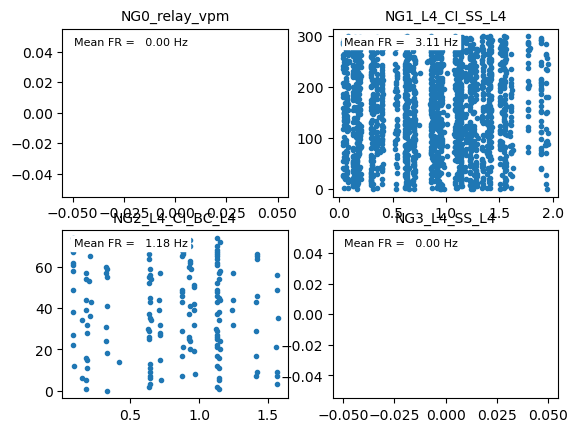

In [11]:
PM.viz.show_spikes(results_filename=file_to_display, savefigname=f"{fig_folder}/Figure8A_Comrad_spikes.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Figure8A_Comrad_IO.eps


(0.2, 0.6)

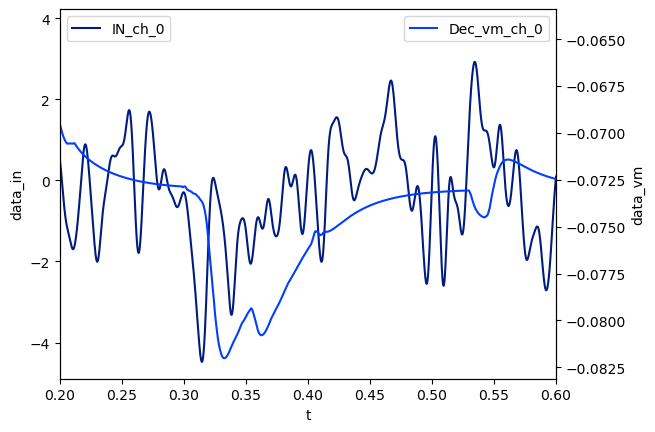

In [12]:
PM.viz.show_readout_on_input(
    results_filename=file_to_display, 
    normalize=False, 
    unit_idx_list=[0], 
    savefigname=f"{fig_folder}/Figure8A_Comrad_IO.eps"
)
plt.xlim((0.2, 0.6))

In [13]:
data = PM.data_io.get_data(filename=None, data_type="results")
params = data["Neuron_Groups_Parameters"]["NG1_L4_CI_SS_L4"]["namespace"]
adex_neuron = nd.AdexNeuron() # Get generic AdEx neuron

adex_neuron.set_neuron_parameters(
    EL = params["EL"], 
    V_res = params["V_res"], 
    VT = params["VT"], 
    gL = params["gL"], 
    C = params["C"], 
    refractory_period = params["refractory_period"],
    a = params["a"],
    b = params["b"],
    tau_w = params["tau_w"],
)
adex_neuron.get_neuron_parameters()

{'EL': -73. * mvolt,
 'V_res': -73. * mvolt,
 'VT': -55. * mvolt,
 'gL': 4. * nsiemens,
 'C': 125. * pfarad,
 'DeltaT': 2. * mvolt,
 'a': 4. * nsiemens,
 'b': 35.8 * pamp,
 'tau_w': 144. * msecond,
 'refractory_period': 3. * msecond,
 'Vcut': -30. * mvolt}

N_steps = 101


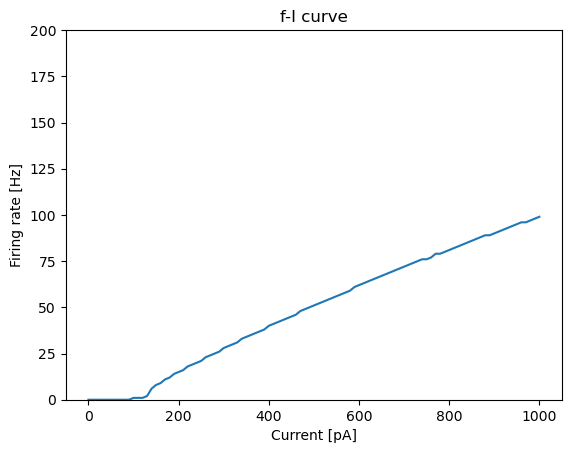

In [14]:
max_rate = 200
adex_neuron.plot_fi_curve(max_rate=max_rate, save_name=f"{experiment}/{fig_folder}/Figure8A_Comrad_fI.eps")

#### Prepare and run single file: Comrad example

In [15]:
current_data = "Bacon_AdEx"

In [16]:
PM.context.output_folder = experiment_path.joinpath(current_data)

In [17]:
# Copy Anat and Phys csv files from start point folder to path and update paths into the csv:s
anat_file_fullpath_out , phys_file_fullpath_out = PM.prepare_csvs_for_simulation(anat_name="Anat_Bacon_221122_startpoint.csv", phys_name="Phys_Bacon_221122_startpoint.csv")

# Create necessary current injection files
PM.ct.create_current_injection(randomize=False)

# Run CxSystem2 for single file. Remove the stdout=subprocess.DEVNULL to see simulation output
command_and_args = ["cxsystem2", "-a", str(anat_file_fullpath_out), "-p", str(phys_file_fullpath_out)]
subprocess.run(command_and_args, text=True, encoding="utf-8", stdout=subprocess.DEVNULL)

CompletedProcess(args=['cxsystem2', '-a', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure8\\Anat_Bacon_221122_AdEx.csv', '-p', 'C:\\Users\\Simo\\Laskenta\\Git_Repos\\SystemTools\\scripts\\FCN22\\Figure8\\Phys_Bacon_221122_AdEx.csv'], returncode=0)

In [18]:
# file_to_display = r"[your/full/path/to/datafile].gz"  
file_to_display = None # Most recent

### Figure 8B

['NG0_relay_vpm', 'NG1_L4_CI_SS_L4', 'NG2_L4_CI_BC_L4', 'NG3_L4_SS_L4']
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Figure8B_Bacon_spikes.eps


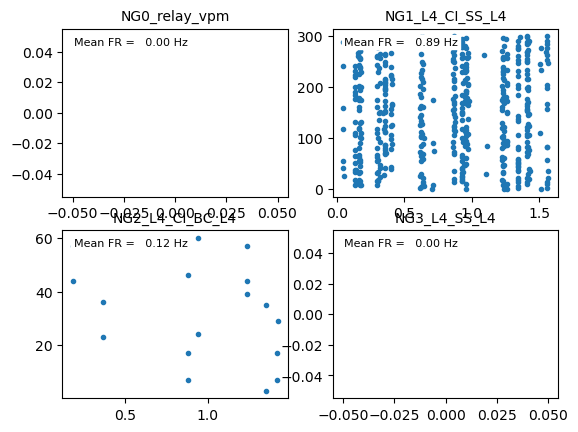

In [19]:
PM.viz.show_spikes(results_filename=file_to_display, savefigname=f"{fig_folder}/Figure8B_Bacon_spikes.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Figure8B_Bacon_IO.eps


(0.2, 0.6)

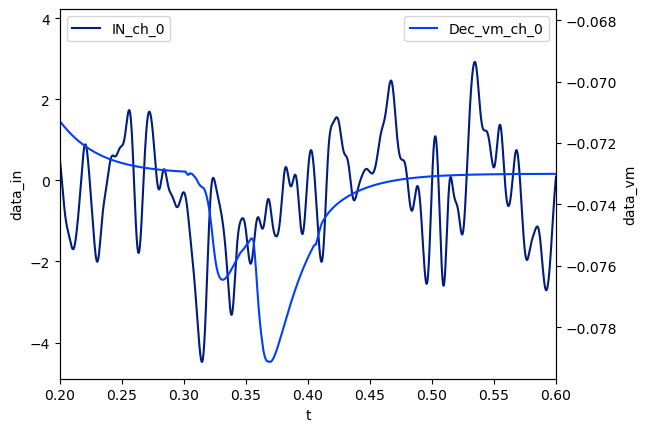

In [20]:
PM.viz.show_readout_on_input(
    results_filename=file_to_display, 
    normalize=False, 
    unit_idx_list=[0], 
    savefigname=f"{fig_folder}/Figure8B_Bacon_IO.eps"
)
plt.xlim((0.2, 0.6))

In [21]:
data = PM.data_io.get_data(filename=None, data_type="results")
params = data["Neuron_Groups_Parameters"]["NG1_L4_CI_SS_L4"]["namespace"]
adex_neuron = nd.AdexNeuron() # Get generic AdEx neuron

adex_neuron.set_neuron_parameters(
    EL = params["EL"], 
    V_res = params["V_res"], 
    VT = params["VT"], 
    gL = params["gL"], 
    C = params["C"], 
    refractory_period = params["refractory_period"],
    a = params["a"],
    b = params["b"],
    tau_w = params["tau_w"],
)
adex_neuron.get_neuron_parameters()

{'EL': -72. * mvolt,
 'V_res': -67.7 * mvolt,
 'VT': -42.3 * mvolt,
 'gL': 3.9 * nsiemens,
 'C': 100. * pfarad,
 'DeltaT': 2. * mvolt,
 'a': 4. * nsiemens,
 'b': 60. * pamp,
 'tau_w': 100. * msecond,
 'refractory_period': 3. * msecond,
 'Vcut': -30. * mvolt}

N_steps = 101


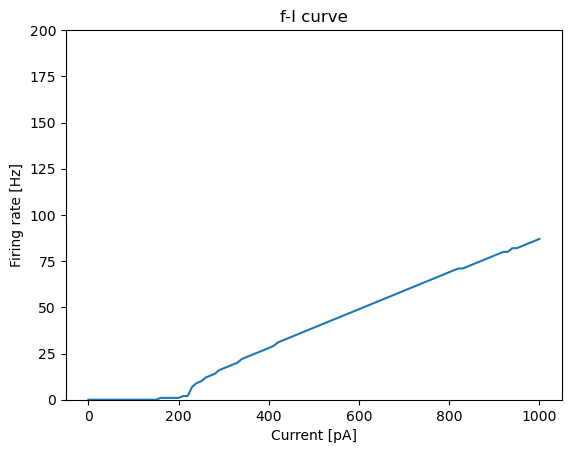

In [22]:
max_rate = 200
adex_neuron.plot_fi_curve(max_rate=max_rate, save_name=f"{experiment}/{fig_folder}/Figure8B_Bacon_exc_fI.eps")

In [23]:
data = PM.data_io.get_data(filename=None, data_type="results")
params = data["Neuron_Groups_Parameters"]["NG2_L4_CI_BC_L4"]["namespace"]
adex_neuron = nd.AdexNeuron() # Get generic AdEx neuron

adex_neuron.set_neuron_parameters(
    EL = params["EL"], 
    V_res = params["V_res"], 
    VT = params["VT"], 
    gL = params["gL"], 
    C = params["C"], 
    refractory_period = params["refractory_period"],
    a = params["a"],
    b = params["b"],
    tau_w = params["tau_w"],
)
adex_neuron.get_neuron_parameters()

{'EL': -72. * mvolt,
 'V_res': -71.9 * mvolt,
 'VT': -41. * mvolt,
 'gL': 4. * nsiemens,
 'C': 36. * pfarad,
 'DeltaT': 2. * mvolt,
 'a': 4. * nsiemens,
 'b': 12. * pamp,
 'tau_w': 25. * msecond,
 'refractory_period': 3. * msecond,
 'Vcut': -30. * mvolt}

N_steps = 101


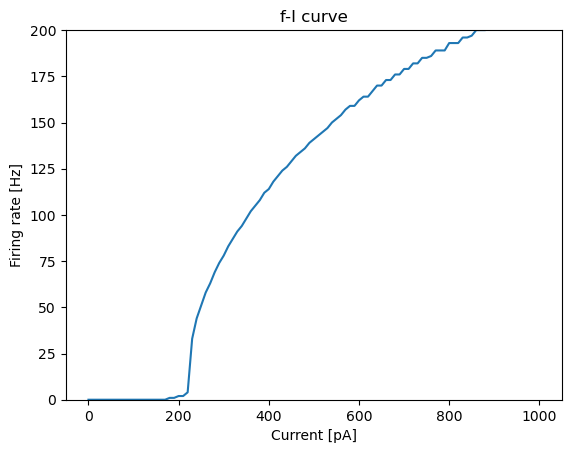

In [24]:
max_rate = 200
adex_neuron.plot_fi_curve(max_rate=max_rate, save_name=f"{experiment}/{fig_folder}/Figure8B_Bacon_inh_fI.eps")

### Vizualize mean of 10 iterations, results precalculated

In [25]:
# Copy precalculated results to experiment folders
input_folder_list = [
    "precalculated_results/AdEx/Comrad_C_compiled_results", 
    "precalculated_results/AdEx/Bacon_C_compiled_results", 
    "precalculated_results/AdEx/Comrad_gL_compiled_results", 
    "precalculated_results/AdEx/Bacon_gL_compiled_results", 
    "precalculated_results/AdEx/Comrad_EL_compiled_results", 
    "precalculated_results/AdEx/Bacon_EL_compiled_results", 
    "precalculated_results/AdEx/Comrad_VT_compiled_results", 
    "precalculated_results/AdEx/Bacon_VT_compiled_results", 
    "precalculated_results/AdEx/Comrad_delay_compiled_results", 
    "precalculated_results/AdEx/Bacon_delay_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Comrad_gL_compiled_results", 
    "precalculated_results/Single_narrow_iteration_R1/Bacon_gL_compiled_results", 
]
# These will appear under experiment_path
output_folder_list = [
    "Comrad_C_compiled_results",
    "Bacon_C_compiled_results",
    "Comrad_gL_compiled_results",
    "Bacon_gL_compiled_results",
    "Comrad_EL_compiled_results",
    "Bacon_EL_compiled_results",
    "Comrad_VT_compiled_results",
    "Bacon_VT_compiled_results",
    "Comrad_delay_compiled_results",
    "Bacon_delay_compiled_results",
    "Comrad_gL_compiled_results_LIF",
    "Bacon_gL_compiled_results_LIF",
]
for this_input, this_output in zip(input_folder_list, output_folder_list):
    PM.transfer_precalculated_results(input_folder=this_input, output_folder=this_output, verbose=False)

### Figure 8C

In [26]:
current_data = "Comrad_gL_compiled_results"
PM.viz.save_figure_with_arrayidentifier = "Fig8C_Comrad_gL"
plt.rcParams["figure.figsize"] = (16, 4)

In [27]:
PM.context.output_folder = experiment_path.joinpath(current_data)

Creating one figure for each neuron group
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_MeanFR_NG1_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_MeanFR_NG1_mean.png


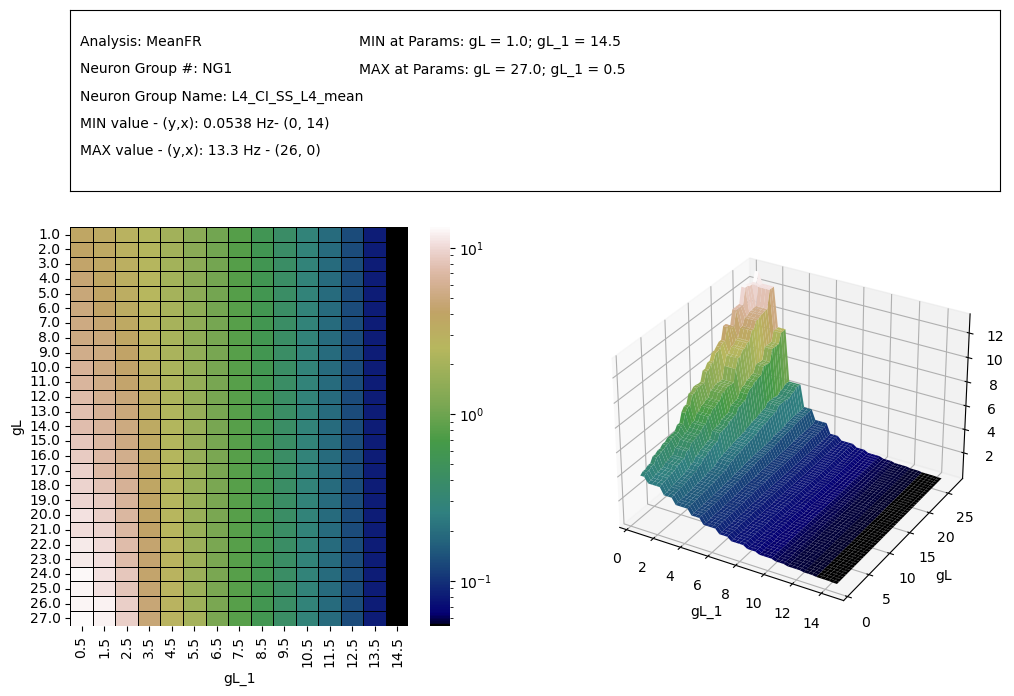

In [28]:
PM.viz.show_analyzed_arrayrun(
    csv_filename="MeanFR_mean.csv",
    analysis="MeanFR",
    variable_unit="Hz",
    logscale=True,
    annotation_2D=False,
    NG_id_list=['NG1'],
)

In [29]:
csv_filename = "Coherence_GrCaus_NormError_TransferEntropy_mean.csv"

All neuron groups requested
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_Coherence_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_Coherence_mean.png


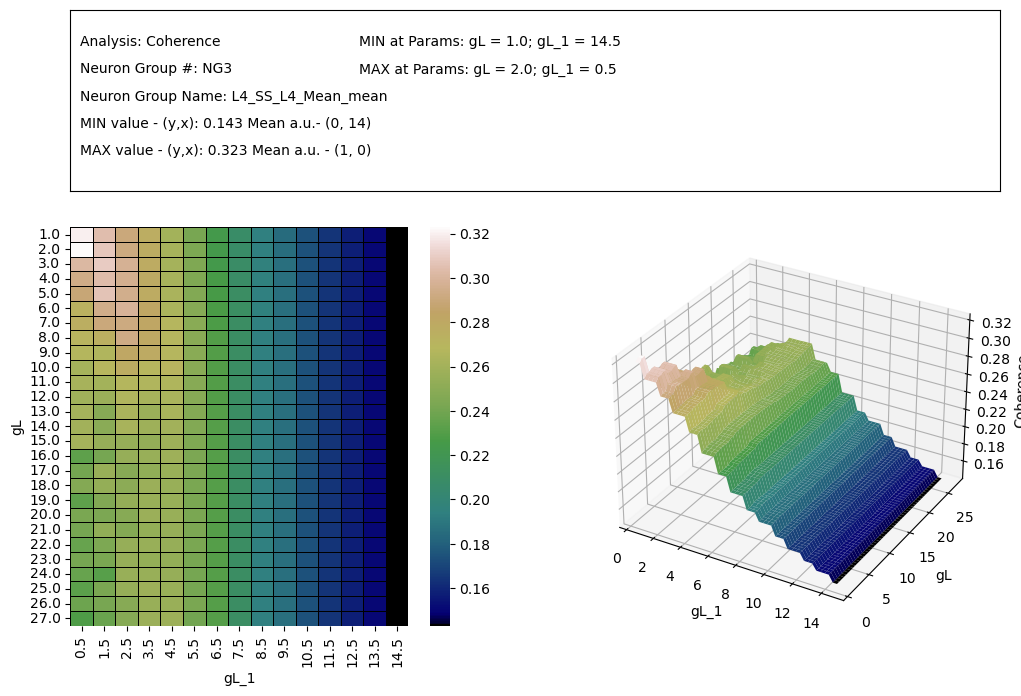

In [30]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="Coherence",
        variable_unit="Mean a.u.",
        annotation_2D=False,
    )

Creating one figure for each analysis
All neuron groups requested
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_GrCaus_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_GrCaus_mean.png


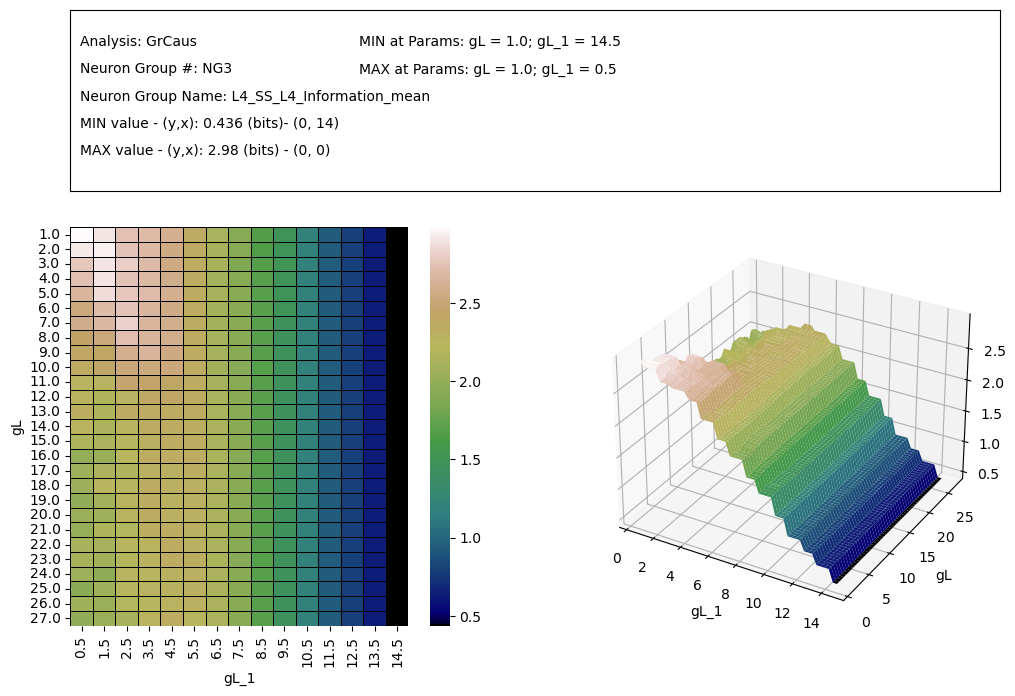

In [31]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="GrCaus",
        variable_unit="bit",
        annotation_2D=False,
    )

All neuron groups requested
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_TransferEntropy_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_TransferEntropy_mean.png


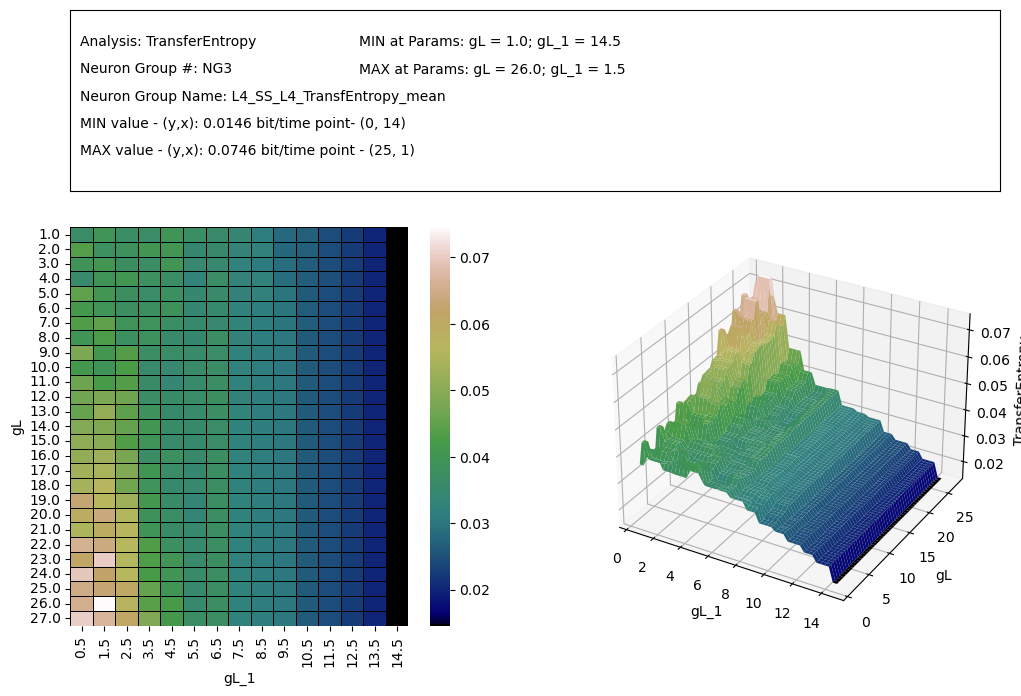

In [32]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="TransferEntropy",
        variable_unit="bit/time point",
        annotation_2D=False,
    )

All neuron groups requested
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_NormError_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8C_Comrad_gL_NormError_mean.png


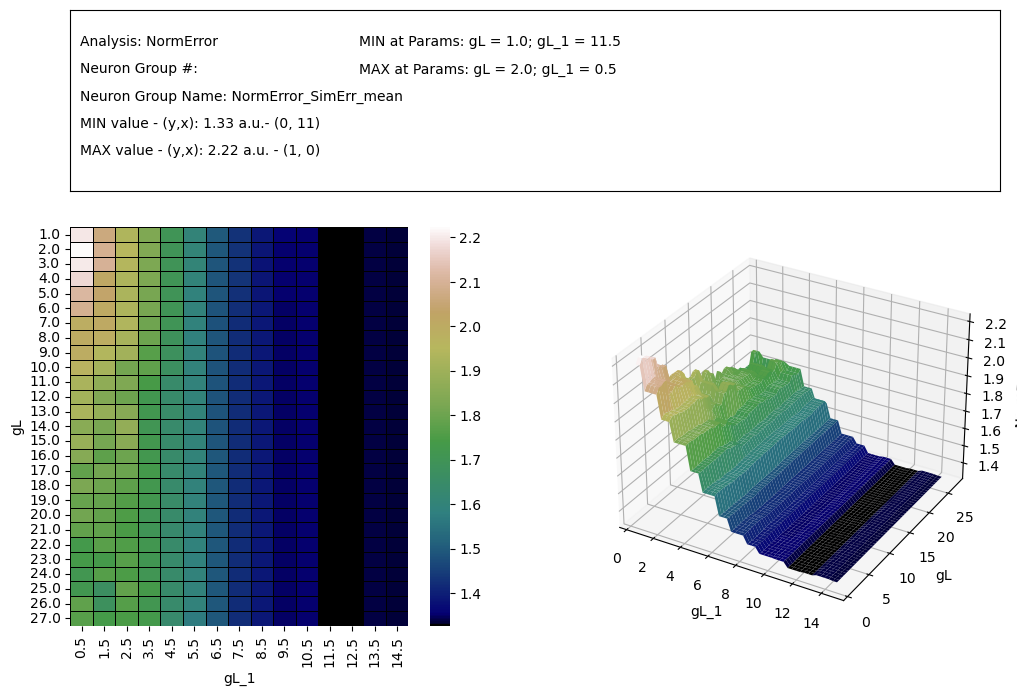

In [33]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="NormError",
        variable_unit="a.u.",
        annotation_2D=False,
    )

### Figure 8D

In [34]:
current_data = "Bacon_gL_compiled_results"
PM.viz.save_figure_with_arrayidentifier = "Fig8D_Bacon_gL"

In [35]:
PM.context.output_folder = experiment_path.joinpath(current_data)

Creating one figure for each neuron group
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_MeanFR_NG1_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_MeanFR_NG1_mean.png


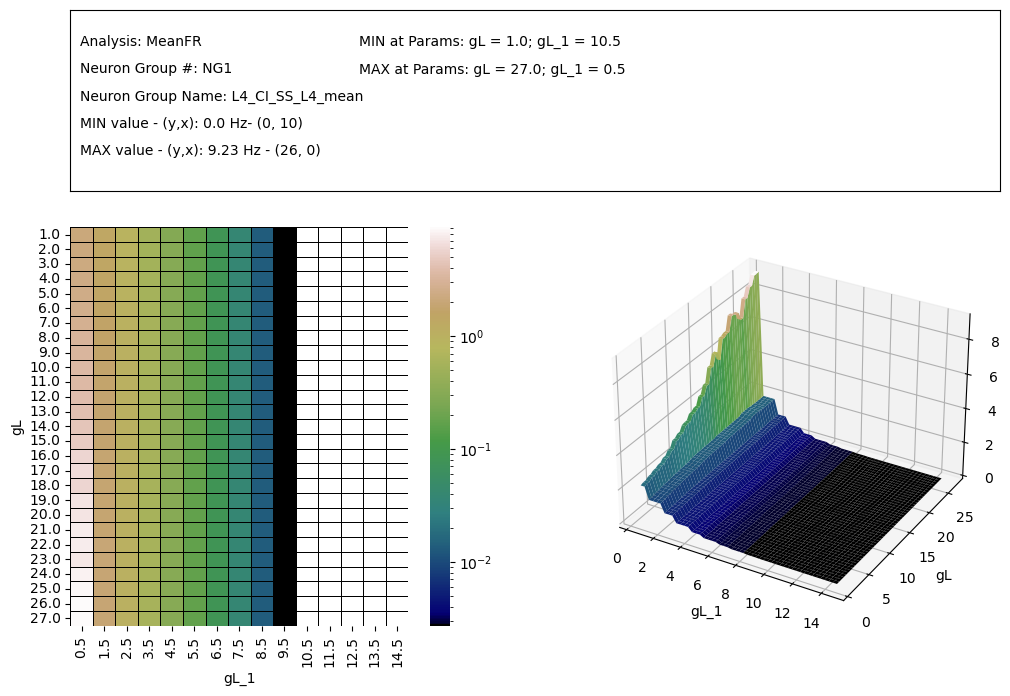

In [36]:
PM.viz.show_analyzed_arrayrun(
    csv_filename="MeanFR_mean.csv",
    analysis="MeanFR",
    variable_unit="Hz",
    logscale=True,
    annotation_2D=False,
    NG_id_list=['NG1'],
)

In [37]:
csv_filename = "Coherence_GrCaus_NormError_TransferEntropy_mean.csv"

All neuron groups requested
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_Coherence_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_Coherence_mean.png


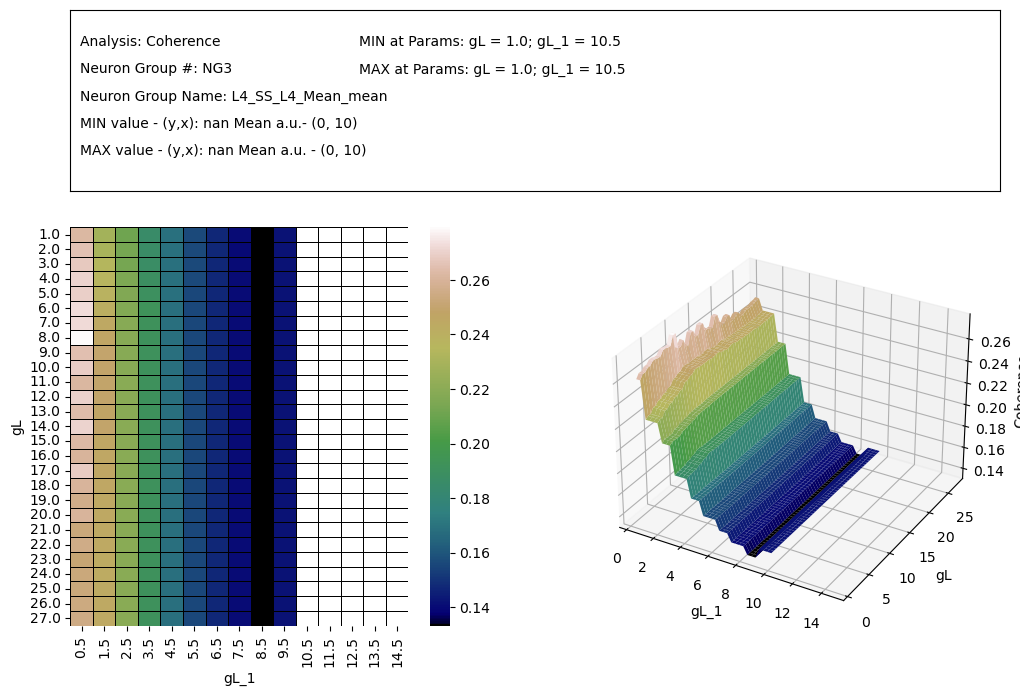

In [38]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="Coherence",
        variable_unit="Mean a.u.",
        annotation_2D=False,
    )

Creating one figure for each analysis
All neuron groups requested
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_GrCaus_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_GrCaus_mean.png


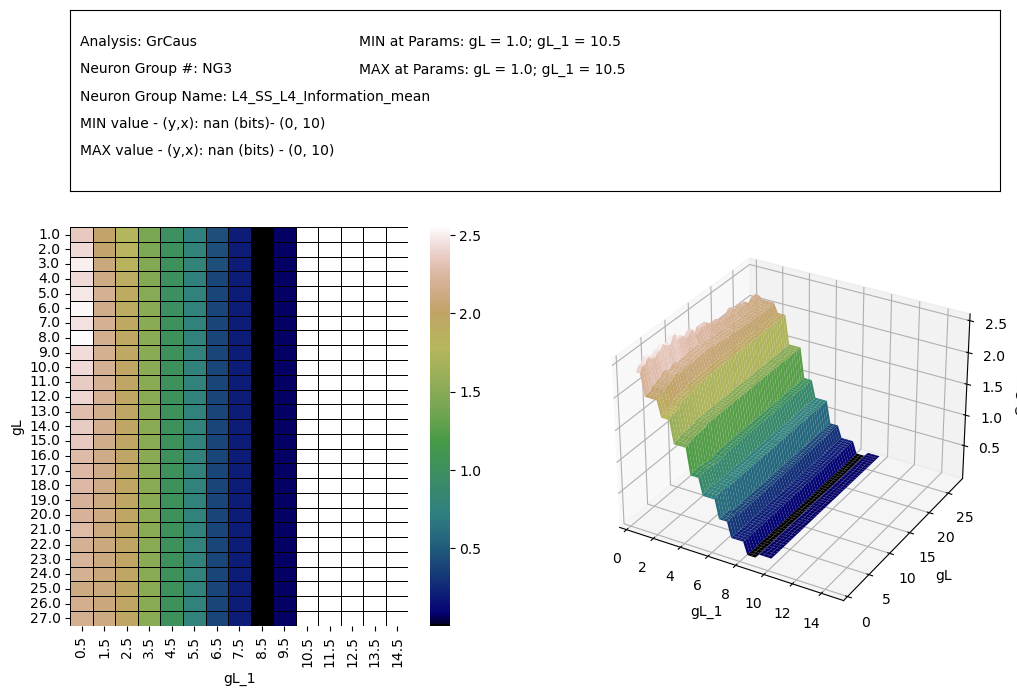

In [39]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="GrCaus",
        variable_unit="bit",
        annotation_2D=False,
    )

All neuron groups requested
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_TransferEntropy_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_TransferEntropy_mean.png


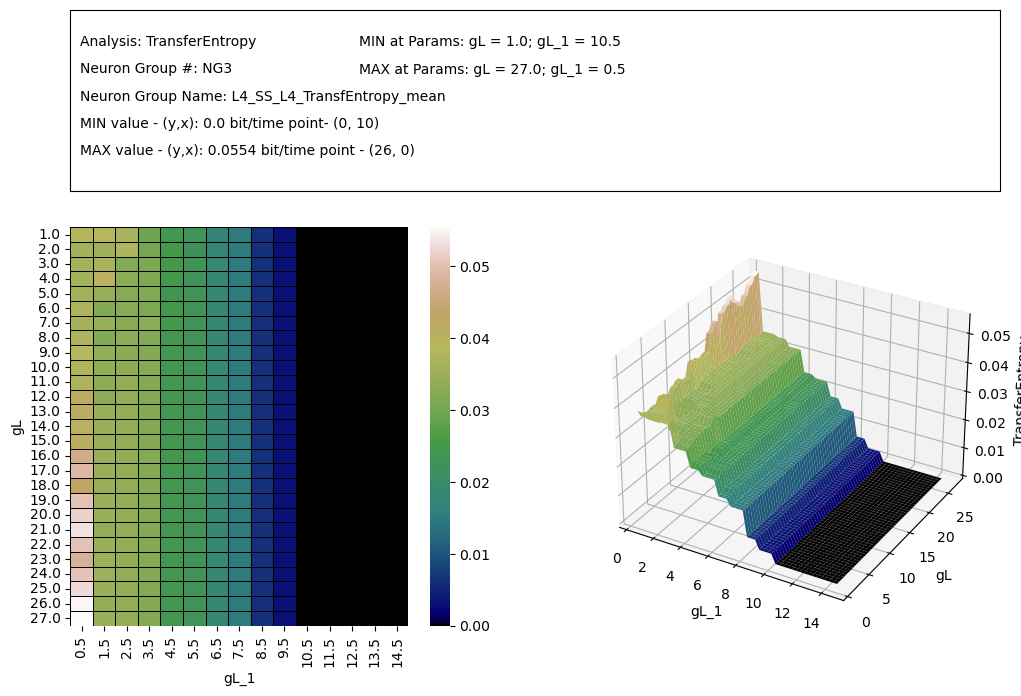

In [40]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="TransferEntropy",
        variable_unit="bit/time point",
        annotation_2D=False,
    )

All neuron groups requested
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_NormError_mean.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8D_Bacon_gL_NormError_mean.png


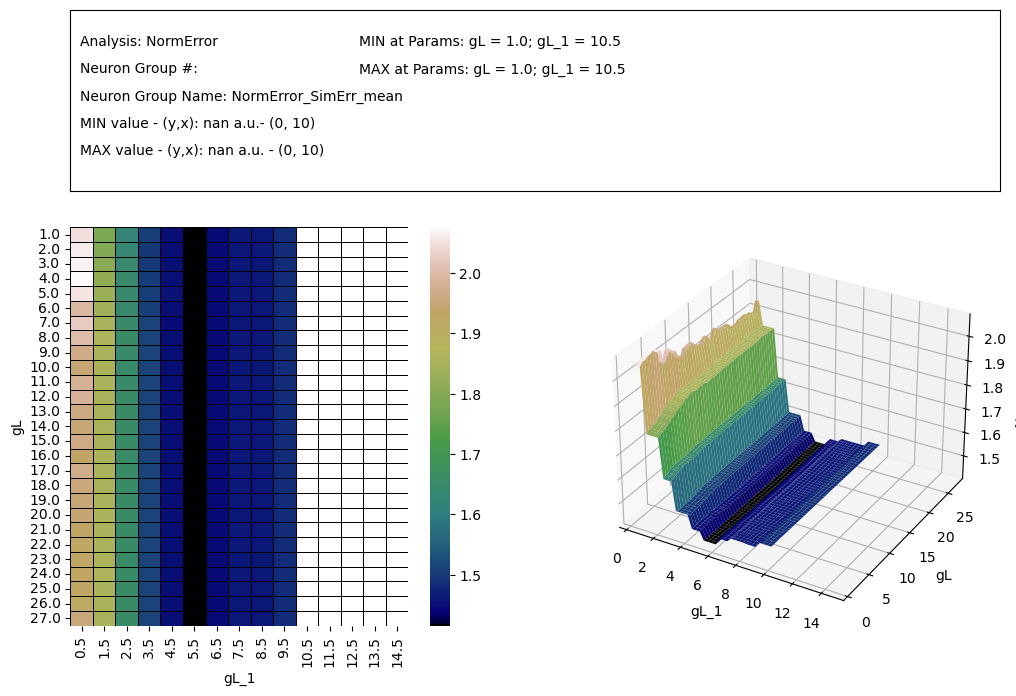

In [41]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="NormError",
        variable_unit="a.u.",
        annotation_2D=False,
    )

### Figure 8E
#### Comparison of information quantities between Comrad, Bacon X LIF, AdEx

In [42]:
PM.viz.save_figure_with_arrayidentifier = "Fig8E_Comrad_Bacon_X_LIF_AdEx"

Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8E_Comrad_Bacon_X_LIF_AdEx_box_.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8E_Comrad_Bacon_X_LIF_AdEx_box_.png


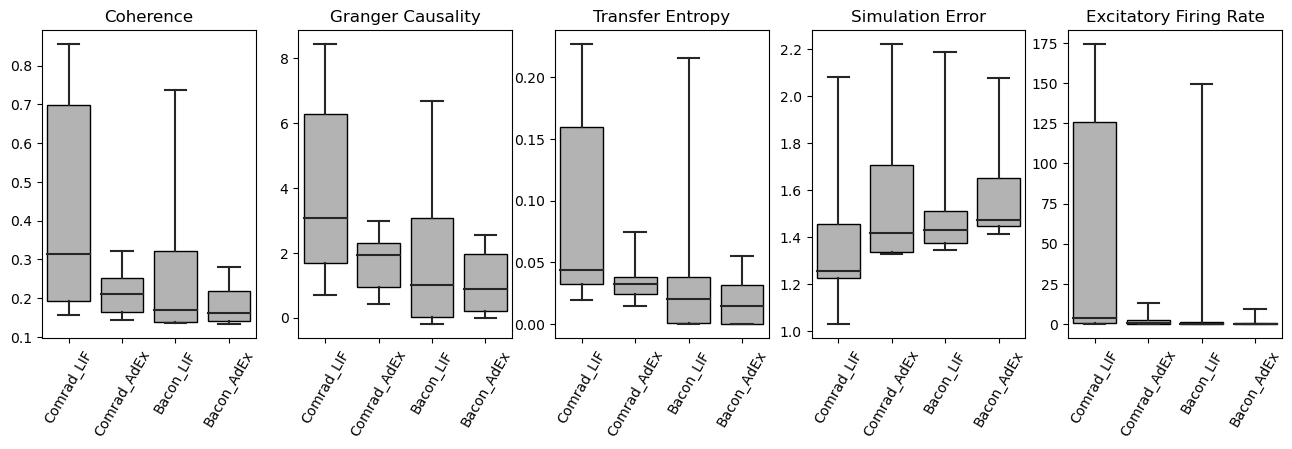

In [43]:
    """
    Definitions for parametric plotting of multiple conditions/categories.
    First, define what data is going to be visualized in to_spa_dict above.
    Second, define how it is visualized in param_plot_dict below.

    Limitations: 
        You cannot have analyzes as title AND inner_sub = True.

    outer : panel (distinct subplots) # analyzes, startpoints, parameters, controls
    inner : inside one axis (subplot) # startpoints, parameters, controls
    inner_sub : bool, further subdivision by value, such as mean firing rate
    inner_sub_ana : name of ana. This MUST be included into to_spa_dict "analyzes"
    plot_type : parametric plot type 

    compiled_results : bool, data at compiled_results folder, mean over iterations

    inner_paths : bool, Provide comparison from arbitrary paths, e.g. controls. The 'inner' is ignored.
    inner_path_names: list of names of paths to compare.
    paths : provide list of tuples of full path parts to data folder. 
    E.g. [(path, 'Single_narrow_iterations_control', 'Bacon_gL_compiled_results'),] 
    The number of paths MUST be the same as the number of corresponding inner variables. 
    """

    param_plot_dict = {
        "title": "parameters", 
        "outer": "analyzes",  
        "inner": "startpoints",  # If "inner_paths" is True, this 'inner' is ignored 
        "inner_sub": False,  # Cannot be activated without additional options
        "plot_type": "box",  # "violin" (2), "box", "strip", "swarm", "boxen", "point", "bar"
        "compiled_results": True, 
        "sharey": False,
        "palette": "Greys",
        "inner_paths": True,
        "inner_path_names": ["Comrad_LIF", "Comrad_AdEx", "Bacon_LIF", "Bacon_AdEx"],
        "paths": [
            (experiment_path, 'Comrad_gL_compiled_results_LIF'),
            (experiment_path, 'Comrad_gL_compiled_results'),
            (experiment_path, 'Bacon_gL_compiled_results_LIF'),
            (experiment_path, 'Bacon_gL_compiled_results'),
            ],
        "inner_stat_test": False,
        "save_description": False, # Cannot be activated without additional options
        "display_optimal_values": False, # Cannot be activated without additional options
    }
    PM.viz.show_catplot(param_plot_dict)

### Figure 8F

In [44]:
PM.viz.save_figure_with_arrayidentifier = "Fig8F_classification_accuracy"

Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8F_classification_accuracy_An_vs_An_XY.svg
Saving figure to C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts\FCN22\Figure8\Analysis_Figures\Fig8F_classification_accuracy_An_vs_An_XY.png


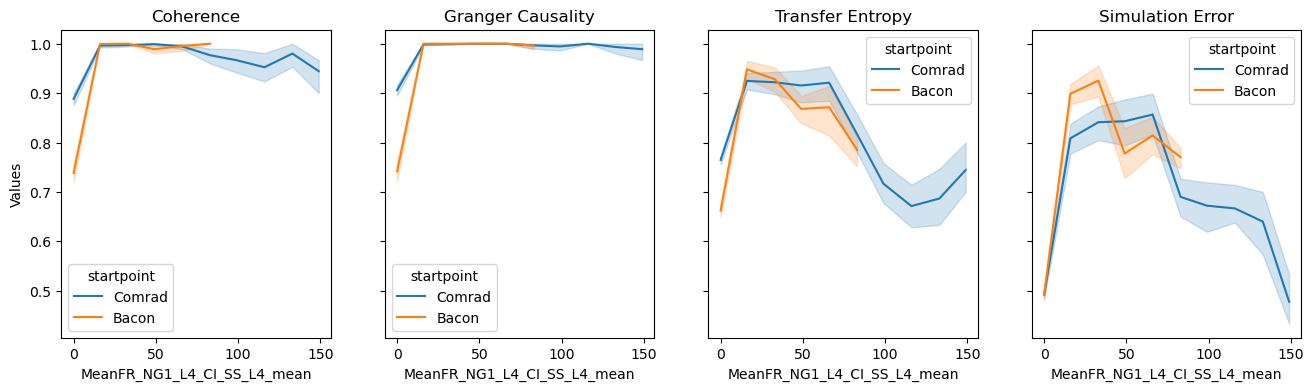

In [45]:
"""
Show xy plot allows any parametric data plotted against each other.
Uses seaborn regplot or lineplot. Seaborn options easy to include into code (viz_module).
All analyzes MUST be included into to_spa_dict
Same data at the x and y axis simultaneously can be used with regplot.
If compiled_type is accuracy, and only mean datatype is available, 
uses the mean. 

startpoints: "Comrad", "Bacon", "HiFi"
parameters: "C", "gL", "VT", "EL", "delay"
analyzes: 
"Coherence", "Granger Causality", "Transfer Entropy", "Simulation Error", "Excitatory Firing Rate", "Inhibitory Firing Rate", "Euclidean Distance"

kind: regplot, binned_lineplot 
    regplot is scatterplot, where only single startpoint and parameter should be plotted at a time. draw_regression available.
    binned_lineplot bins x-data, then compiles parameters/startpoints and finally shows distinct startpoints/parameters (according to "hue") with distinct hues. Error shading 
    indicates 95% confidence interval, obtained by bootstrapping the data 1000 times (seaborn default)
"""
xy_plot_dict = {
    "x_ana": ["Excitatory Firing Rate",],  
    "x_start": ["Comrad", "Bacon"],  
    "x_para": ["C", "gL", "VT", "EL", "delay"],  
    "x_ave": False,  
    "y_ana": [
        "Coherence",
        "Granger Causality",
        "Transfer Entropy",
        "Simulation Error",
        ],  
    "y_start":  ["Comrad", "Bacon"],  
    "y_para": ["C", "gL", "VT", "EL", "delay"],  
    "y_ave": False,  
    "kind": "binned_lineplot",  # binned_lineplot, regplot
    "n_bins": 10,  # ignored for regplot
    "hue": "startpoint",  # Ignored for regplot
    "compiled_results": True, 
    "compiled_type": "accuracy",  # mean, accuracy; falls back to mean if accuracy not found
    "draw_regression": False,  # only for regplot
    "order": 1,  # Regression polynomial fit order, only for regplot
    "draw_diagonal": False,  # only for regplot
    "xlog": False,
    "ylog": False,
    "sharey": True,
}

PM.viz.show_xy_plot(xy_plot_dict)